In [1]:
import xarray as xr
import yt
import os
import numpy as np
import cartopy.feature as cfeature
import cartopy.crs as ccrs

ddir = os.path.join(yt.config.ytcfg.get('yt','test_data_dir'), 'sample_nc')
      

# https://ds.iris.edu/files/products/emc/emc-files/GYPSUM_percent.nc : a global model
# https://ds.iris.edu/files/products/emc/emc-files/wUS-SH-2010_percent.nc : a non-global model covering the western US


datasets = {
    "internal_geographic_partial": os.path.join(ddir,'wUS-SH-2010_percent.nc'), 
    "internal_geographic_global": os.path.join(ddir,'GYPSUM_percent.nc'), 
}

def get_internal_IRIS(case):
    # both datasets have the same variables and dimension order
    
    fi = datasets[case]

    with xr.open_dataset(fi) as xr_ds:
        dvs = xr_ds.dvs.to_masked_array().data
        deprng = [xr_ds.depth.data.min(), xr_ds.depth.data.max()]
        lonrng=[xr_ds.longitude.data.min(), xr_ds.longitude.data.max()]
        latrng=[xr_ds.latitude.data.min(), xr_ds.latitude.data.max()]

    data = {'dvs': (dvs, "%")}
    
    bbox = np.array([
      deprng,   
      latrng,
      lonrng
    ])

    dims = ['depth', 'latitude', 'longitude']

    return yt.load_uniform_grid(data, data['dvs'][0].shape, 1.0, 
                                geometry=("internal_geographic", dims),
                                bbox=bbox)

In [2]:
ds = get_internal_IRIS("internal_geographic_global")
ds._periodicity = (False, True, True)

yt : [INFO     ] 2022-08-26 14:54:01,019 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-08-26 14:54:01,019 Parameters: domain_dimensions         = [100 181 361]
yt : [INFO     ] 2022-08-26 14:54:01,020 Parameters: domain_left_edge          = [   0.  -90. -180.]
yt : [INFO     ] 2022-08-26 14:54:01,023 Parameters: domain_right_edge         = [2900.   90.  180.]
yt : [INFO     ] 2022-08-26 14:54:01,023 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2022-08-26 14:54:01,105 xlim = -180.000000 180.000000
yt : [INFO     ] 2022-08-26 14:54:01,106 ylim = -90.000000 90.000000
yt : [INFO     ] 2022-08-26 14:54:01,106 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2022-08-26 14:54:01,107 xlim = -180.000000 180.000000
yt : [INFO     ] 2022-08-26 14:54:01,108 ylim = -90.000000 90.000000
yt : [INFO     ] 2022-08-26 14:54:01,111 Making a fixed resolution buffer of (('stream', 'dvs')) 800 by 800



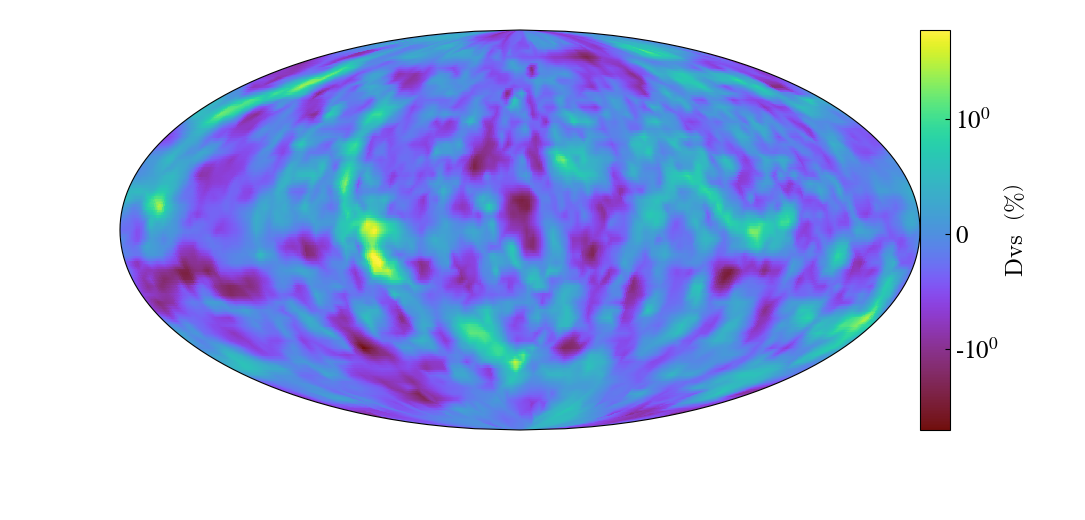

In [3]:
yt.SlicePlot(ds, "depth", ("stream", "dvs"))

yt : [INFO     ] 2022-08-26 14:54:02,834 xlim = -180.000000 180.000000
yt : [INFO     ] 2022-08-26 14:54:02,835 ylim = -90.000000 90.000000
yt : [INFO     ] 2022-08-26 14:54:02,835 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2022-08-26 14:54:02,836 xlim = -180.000000 180.000000
yt : [INFO     ] 2022-08-26 14:54:02,837 ylim = -90.000000 90.000000
yt : [INFO     ] 2022-08-26 14:54:02,839 Making a fixed resolution buffer of (('stream', 'dvs')) 800 by 800



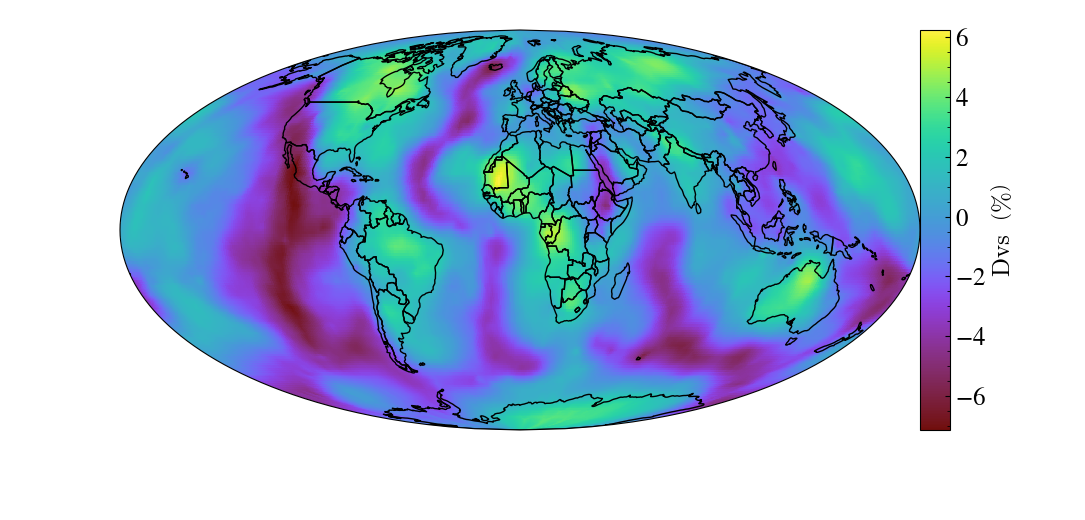

In [4]:
c = ds.domain_center
c[0] = 100
slc = yt.SlicePlot(ds, "depth", ("stream", "dvs"), center=c)
slc.set_log(("stream", "dvs"), False)

slc._setup_plots()
carto_ax = slc.plots['dvs'].axes
carto_ax.add_feature(cfeature.NaturalEarthFeature(
        'cultural', 'admin_0_countries', '110m',
        edgecolor='black', facecolor='none'))

slc.show()

yt : [INFO     ] 2022-08-26 14:54:04,784 xlim = -305.000000 55.000000
yt : [INFO     ] 2022-08-26 14:54:04,784 ylim = -90.000000 90.000000
yt : [INFO     ] 2022-08-26 14:54:04,785 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2022-08-26 14:54:04,786 xlim = -305.000000 55.000000
yt : [INFO     ] 2022-08-26 14:54:04,786 ylim = -90.000000 90.000000
yt : [INFO     ] 2022-08-26 14:54:04,789 Making a fixed resolution buffer of (('stream', 'dvs')) 800 by 800



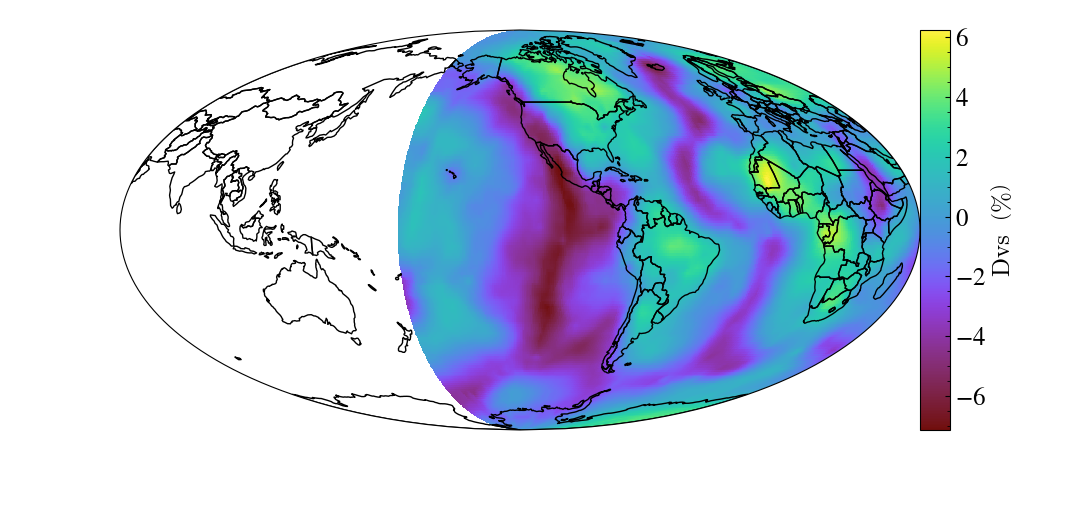

In [5]:
c = ds.domain_center
c[0] = 100.
c[2] = -125.
slc = yt.SlicePlot(ds, "depth", ("stream", "dvs"), center=c)
slc.set_log(("stream", "dvs"), False)

slc._setup_plots()
carto_ax = slc.plots['dvs'].axes
carto_ax.add_feature(cfeature.NaturalEarthFeature(
        'cultural', 'admin_0_countries', '110m',
        edgecolor='black', facecolor='none'))

slc.show()

rotation is right.... why's it getting clipped???????

yt : [INFO     ] 2022-08-26 14:54:06,743 xlim = -180.000000 180.000000
yt : [INFO     ] 2022-08-26 14:54:06,744 ylim = -90.000000 90.000000
yt : [INFO     ] 2022-08-26 14:54:06,744 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2022-08-26 14:54:06,745 xlim = -180.000000 180.000000
yt : [INFO     ] 2022-08-26 14:54:06,746 ylim = -90.000000 90.000000
yt : [INFO     ] 2022-08-26 14:54:06,748 Making a fixed resolution buffer of (('stream', 'dvs')) 800 by 800



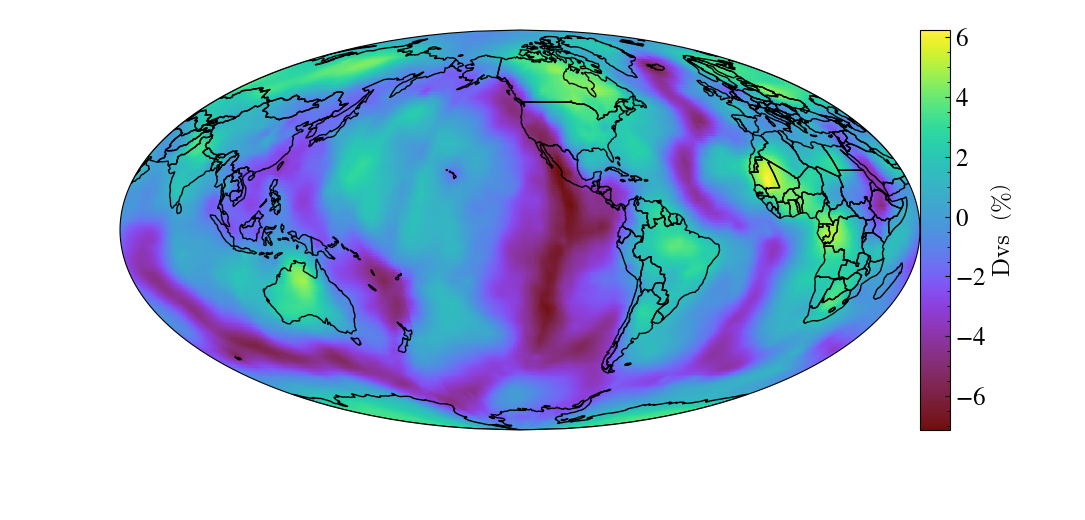

In [6]:
c = ds.domain_center
c[0] = 100
slc = yt.SlicePlot(ds, "depth", ("stream", "dvs"), center=c)
slc.set_log(("stream", "dvs"), False)
slc.set_mpl_projection(('Mollweide', (), {'central_longitude': -125.}))

slc._setup_plots()
carto_ax = slc.plots['dvs'].axes
carto_ax.add_feature(cfeature.NaturalEarthFeature(
        'cultural', 'admin_0_countries', '110m',
        edgecolor='black', facecolor='none'))

slc.show()

In [7]:
ds.coordinates.axis_order

['depth', 'latitude', 'longitude']

In [8]:
import numpy as np
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


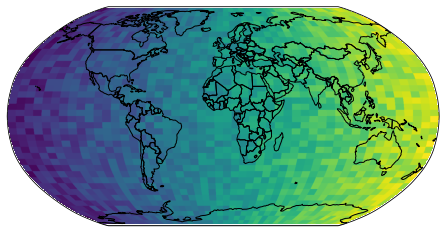

In [20]:
f = plt.figure()
m = ccrs.Robinson()
axes = f.add_axes([0,0,1,1], projection=m)

data = np.random.random((40,50))
x = np.linspace(-180, 180, data.shape[1])
x = np.tile(x, (data.shape[0], 1))
data = data + x/360. * 5


axes.imshow(data,
            transform=ccrs.PlateCarree(), 
            extent=(-180, 180, -90, 90))

axes.add_feature(cfeature.NaturalEarthFeature(
        'cultural', 'admin_0_countries', '110m',
        edgecolor='black', facecolor='none'))

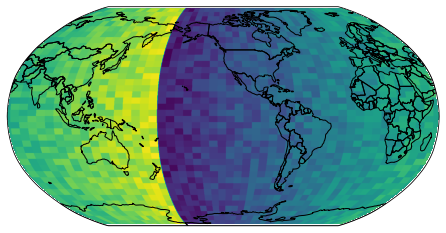

In [21]:
f = plt.figure()
m = ccrs.Robinson(central_longitude=-125)
axes = f.add_axes([0,0,1,1], projection=m)


axes.imshow(data,
            transform=ccrs.PlateCarree(), 
            extent=(-180, 180, -90, 90))

axes.add_feature(cfeature.NaturalEarthFeature(
        'cultural', 'admin_0_countries', '110m',
        edgecolor='black', facecolor='none'))

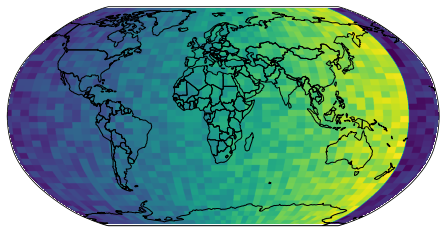

In [22]:
f = plt.figure()
m = ccrs.Robinson(central_longitude=25)
axes = f.add_axes([0,0,1,1], projection=m)


axes.imshow(data,
            transform=ccrs.PlateCarree(), 
            extent=(-180, 180, -90, 90))

axes.add_feature(cfeature.NaturalEarthFeature(
        'cultural', 'admin_0_countries', '110m',
        edgecolor='black', facecolor='none'))

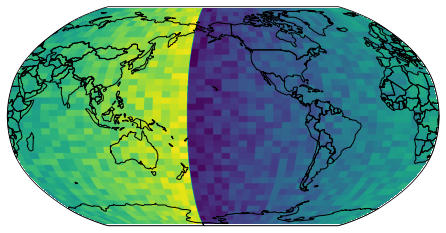

In [23]:
f = plt.figure()
clon = -150
m = ccrs.Robinson(central_longitude=clon)
axes = f.add_axes([0,0,1,1], projection=m)

extent = (-180, 180, -90, 90)
axes.imshow(data,
            transform=ccrs.PlateCarree(), 
            extent=extent)

axes.add_feature(cfeature.NaturalEarthFeature(
        'cultural', 'admin_0_countries', '110m',
        edgecolor='black', facecolor='none'))

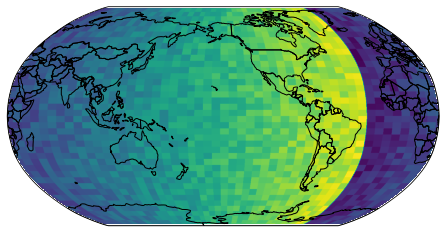

In [24]:
f = plt.figure()
clon = -150
m = ccrs.Robinson(central_longitude=clon)
axes = f.add_axes([0,0,1,1], projection=m)

extent = (-180-clon, 180-clon, -90, 90)
axes.imshow(data,
            transform=ccrs.PlateCarree(), 
            extent=extent)

axes.add_feature(cfeature.NaturalEarthFeature(
        'cultural', 'admin_0_countries', '110m',
        edgecolor='black', facecolor='none'))

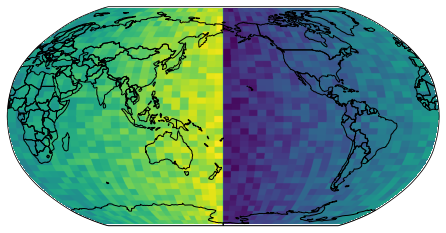

In [27]:
f = plt.figure()
clon = -180
m = ccrs.Robinson(central_longitude=clon)
axes = f.add_axes([0,0,1,1], projection=m)

extent = (-180, 180, -90, 90)
axes.imshow(data,
            transform=ccrs.PlateCarree(), 
            extent=extent)

axes.add_feature(cfeature.NaturalEarthFeature(
        'cultural', 'admin_0_countries', '110m',
        edgecolor='black', facecolor='none'))

In [28]:
data.shape

(40, 50)